In [62]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from random import uniform,randint

def  deltaE(n, kbT):
    n_p=max(n+(-1)**randint(0,1),0)
    dE= hw*(n_p+0.5)-hw*(n+0.5)
    if  dE <= 0.0:
        return n_p
    else:
        r=uniform(0.,1.)
        if np.exp(-dE/kbT) >= r:
            return n_p
        else:
            return  n

def Em(n, hw, kbT, nsample):
    sts=[]
    nsteps = 500
    ct=0
    for i in range(nsample):
        n=deltaE(n, kbT)
        if ct ==nsteps:
            sts.append(n)
            ct=0
        ct+=1
    pr=np.unique(sts,return_counts=True)

    Em = [hw*(pr[0][i]+0.5)*pr[1][i]/len(sts) for i in range(np.shape(pr)[1])]
    return sum(Em)

hw =1.2
kbT =0.5
nsample =1000
n=0

In [ ]:
kbT = np.linspace(0.1, 1.0, 20)
nsample = [10000]
E2=[]
for j in nsample:
    for i in kbT:
        E1 = [Em(n, hw, i, j) for k in range(10)]
        E1 = np.sum(E1)/10
        E2+=[E1]
    #E = [Em(n, hw, i, j) for i in kbT]
    #plt.show()

In [ ]:
kbT = np.linspace(0.1, 1.0, 20)
E1 = []
for i in range(20):
    print(i)
    E1 += [Em1(hw, kbT[i])]

0
1


Text(0.5, 1.0, 'n=10000')

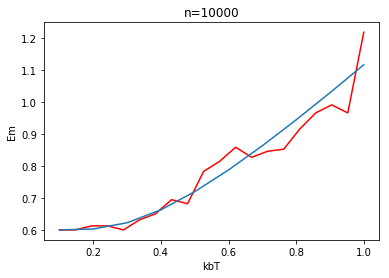

In [73]:
plt.plot(np.linspace(0.1, 1.0, 20), E2, 'r')
plt.plot(np.linspace(0.1, 1.0, 10), E1)
plt.xlabel("kbT")
plt.ylabel("Em")
plt.title("n="+str(j))

In [69]:
### from sympy import *
from sympy import summation, exp, oo

hw = 1.2
kbT = 5.0

def Em1(hw, kbT):
    i = Symbol('i', integer=True)
    Z = summation(exp(-hw*(i+0.5)/kbT), (i, 0, oo))
    E = summation(exp(-hw*(i+0.5)/kbT)*hw*(i+0.5), (i, 0, oo))
    Emed= E.evalf()/Z.evalf()
    return Emed